In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
edadf= pd.read_csv("ab_data.csv")

In [3]:
edadf.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
edadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
edadf.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

<AxesSubplot:xlabel='group', ylabel='count'>

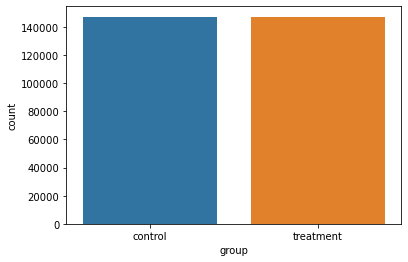

In [6]:
sns.countplot(data= edadf, x= 'group')

We want to confirm that there are infact just 2 groups- control and treatment. We also notice that they have equal number of records for each group.

We also want to see if there are users who are part of both groups. They need to be deleted as they would involve skewed results

In [7]:
newdf= edadf.drop_duplicates(subset ="user_id", keep = False)

In [8]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286690 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       286690 non-null  int64 
 1   timestamp     286690 non-null  object
 2   group         286690 non-null  object
 3   landing_page  286690 non-null  object
 4   converted     286690 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.1+ MB


<AxesSubplot:xlabel='group', ylabel='count'>

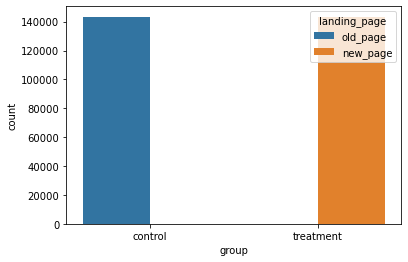

In [9]:
sns.countplot(data= newdf, x= 'group', hue= 'landing_page')

In [19]:
conversion_rates = newdf.groupby('group')['converted'].agg(['count','mean','std'])

In [20]:
conversion_rates.head()

,count,mean,std
group,,,
control,143293,0.120173,0.325165
treatment,143397,0.118726,0.323467


We see that the mean conversion rate for the treatment group is actually less than the control group, however, the difference is very less. We have 12% conversion rate for control vs 11.9% conversion rate for Treatment. We can see that there is very little difference, however we need to check if this difference is statistically significant

In [16]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from statsmodels.stats.weightstats import ztest as ztest

In [13]:
cdf = newdf[newdf['group'] == 'control']['converted']
tdf = newdf[newdf['group'] == 'treatment']['converted']

In [14]:
cdf.head()

0    0
1    0
4    1
5    0
7    0
Name: converted, dtype: int64

The null hypothesis is that the difference between the 2 means is not statistically significant. p-value has to be greater than 0.05 to prove this.

We chose 2 sample z test here as z-test is the statistical test, used to analyze whether two population means are different or not when the variances are known and the sample size is large.

In [15]:
n_con = cdf.count()
n_treat = tdf.count()
successes = [cdf.sum(), tdf.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: 1.19
p-value: 0.232
ci 95% for control group: [0.118, 0.122]
ci 95% for treatment group: [0.117, 0.120]


In [21]:
ztest1=ztest(cdf,tdf,value=0)

In [22]:
ztest1

(1.1944838871517816, 0.23228873989686571)

The first number gives us the test statistic i.e. 1.194 and the second number gives us the p-value, which is .2. Therefore, we accept the null hypothesis and infer that the new changes didnot have any significant difference in conversion rate

A z-statistic, or z-score, is a number representing the value’s relationship to the mean of a group of values, it is measured with population parameters such as population standard deviation and used to validate a hypothesis.